Выгрузка и первичный анализ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [37]:
from main_fu import clean_taxonomy, cols, process_comment

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.shape

(2366, 14)

In [5]:
df.head()

,annotation_id,annotator,comment,created_at,id,lead_time,rating,taxonomy,updated_at,Вопрос решен,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Нравится скорость отработки заявок,Понравилось выполнение заявки
0,2374,1,спасибо,2025-05-17T09:23:28.536565Z,2945792,18.878,5,"[{""taxonomy"":[[""Вопрос решен""],[""Понравилось в...",2025-05-17T09:23:28.536565Z,NaN,NaN,NaN,NaN,NaN
1,2375,1,спасибо!,2025-05-17T09:23:38.456762Z,3234340,7.941,5,"[{""taxonomy"":[[""Вопрос решен""],[""Понравилось в...",2025-05-17T09:23:38.456762Z,NaN,NaN,NaN,NaN,NaN
2,2376,1,Отлично,2025-05-17T09:24:11.486229Z,3380332,31.554,5,"[{""taxonomy"":[[""Вопрос решен""],[""Понравилось в...",2025-05-17T09:24:11.486229Z,NaN,NaN,NaN,NaN,NaN
3,2377,1,Благодарю за оперативное решение проблемы !,2025-05-17T09:24:29.076846Z,3381812,15.591,5,"[{""taxonomy"":[[""Вопрос решен""],[""Понравилось в...",2025-05-17T09:24:29.076846Z,NaN,NaN,NaN,NaN,NaN
4,2378,1,Прекрасный специалист! Побольше таких,2025-05-17T09:24:42.946396Z,3461991,12.202,5,"[{""taxonomy"":[[""Нравится качество работы сотру...",2025-05-17T09:24:42.946396Z,NaN,NaN,NaN,NaN,NaN


Очистка

In [6]:
df.dropna(axis=1, how='all', inplace=True)

In [7]:
df.isna().sum()

annotation_id    0
annotator        0
comment          0
created_at       0
id               0
lead_time        0
rating           0
taxonomy         1
updated_at       0
dtype: int64

In [8]:
# Удаляем строки с некоректными коментарии
df.dropna(subset=['taxonomy'], inplace=True)

In [9]:
df.isna().sum()

annotation_id    0
annotator        0
comment          0
created_at       0
id               0
lead_time        0
rating           0
taxonomy         0
updated_at       0
dtype: int64

In [10]:
df.head()

,annotation_id,annotator,comment,created_at,id,lead_time,rating,taxonomy,updated_at
0,2374,1,спасибо,2025-05-17T09:23:28.536565Z,2945792,18.878,5,"[{""taxonomy"":[[""Вопрос решен""],[""Понравилось в...",2025-05-17T09:23:28.536565Z
1,2375,1,спасибо!,2025-05-17T09:23:38.456762Z,3234340,7.941,5,"[{""taxonomy"":[[""Вопрос решен""],[""Понравилось в...",2025-05-17T09:23:38.456762Z
2,2376,1,Отлично,2025-05-17T09:24:11.486229Z,3380332,31.554,5,"[{""taxonomy"":[[""Вопрос решен""],[""Понравилось в...",2025-05-17T09:24:11.486229Z
3,2377,1,Благодарю за оперативное решение проблемы !,2025-05-17T09:24:29.076846Z,3381812,15.591,5,"[{""taxonomy"":[[""Вопрос решен""],[""Понравилось в...",2025-05-17T09:24:29.076846Z
4,2378,1,Прекрасный специалист! Побольше таких,2025-05-17T09:24:42.946396Z,3461991,12.202,5,"[{""taxonomy"":[[""Нравится качество работы сотру...",2025-05-17T09:24:42.946396Z


In [11]:
df.drop(columns=['created_at', 'annotation_id', 'updated_at', 'id', 'annotator', 'lead_time', 'rating'], inplace=True)

In [12]:
df.drop_duplicates(subset='comment', keep='last')

,comment,taxonomy
66,"Большое спасибо Александру,за оперативность и ...","[{""taxonomy"":[[""Вопрос решен""],[""Понравилось в..."
67,благодарю,"[{""taxonomy"":[[""Вопрос решен""],[""Понравилось в..."
68,оперативно и качественно. спасибо,"[{""taxonomy"":[[""Нравится скорость отработки за..."
70,"благодарю, всего доброго!","[{""taxonomy"":[[""Вопрос решен""],[""Понравилось в..."
75,К мастеру вопросов нет.,"[{""taxonomy"":[[""Нравится качество работы сотру..."
...,...,...
2361,"долго, но приятно","[{""taxonomy"":[[""Вопрос решен""],[""Жалобы и вопр..."
2362,16.03.2024 г ребята установили кондиционер. ра...,"[{""taxonomy"":[[""Вопрос решен""],[""Понравилось в..."
2363,два дня мусоропровод. сегодня с утра тоже,"[{""taxonomy"":[[""Вопрос не решен""],[""Жалобы и в..."
2364,отрегулировать дверь замки . для должного откр...,"[{""taxonomy"":[[""Вопрос не решен""],[""Жалобы и в..."


In [13]:
df.head()

,comment,taxonomy
0,спасибо,"[{""taxonomy"":[[""Вопрос решен""],[""Понравилось в..."
1,спасибо!,"[{""taxonomy"":[[""Вопрос решен""],[""Понравилось в..."
2,Отлично,"[{""taxonomy"":[[""Вопрос решен""],[""Понравилось в..."
3,Благодарю за оперативное решение проблемы !,"[{""taxonomy"":[[""Вопрос решен""],[""Понравилось в..."
4,Прекрасный специалист! Побольше таких,"[{""taxonomy"":[[""Нравится качество работы сотру..."


Форматирование

In [14]:
df['taxonomy'] = df['taxonomy'].apply(clean_taxonomy)

In [15]:
df.head()

,comment,taxonomy
0,спасибо,"[Вопрос решен, Понравилось выполнение заявки]"
1,спасибо!,"[Вопрос решен, Понравилось выполнение заявки]"
2,Отлично,"[Вопрос решен, Понравилось выполнение заявки]"
3,Благодарю за оперативное решение проблемы !,"[Вопрос решен, Понравилось выполнение заявки, ..."
4,Прекрасный специалист! Побольше таких,[Нравится качество работы сотрудников]


In [16]:
df.shape

(2365, 2)

In [17]:
df.to_csv('clean.csv', index=False)

In [18]:
# Если taxonomy сохранена как строка, конвертируем в список
if isinstance(df['taxonomy'].iloc[0], str):
    df['taxonomy'] = df['taxonomy'].apply(ast.literal_eval)

# Создаем бинарные колонки для каждой категории
for category in cols:
    df[category] = df['taxonomy'].apply(lambda x: int(category in x))

# Удаляем исходную колонку taxonomy (если нужно)
df.drop('taxonomy', axis=1, inplace=True)

In [19]:
df.head()

,comment,Вопрос не решен,Вопрос решен,Нравится качество выполнения заявки,Понравилось выполнение заявки,Нравится качество работы сотрудников,Жалобы и вопросы,Нравится скорость отработки заявок
0,спасибо,0,1,0,1,0,0,0
1,спасибо!,0,1,0,1,0,0,0
2,Отлично,0,1,0,1,0,0,0
3,Благодарю за оперативное решение проблемы !,0,1,0,1,0,0,1
4,Прекрасный специалист! Побольше таких,0,0,0,0,1,0,0


In [20]:
# Создание новой колонки
df['cleaned_comment'] = df['comment'].apply(process_comment)

In [21]:
df.head()

,comment,Вопрос не решен,Вопрос решен,Нравится качество выполнения заявки,Понравилось выполнение заявки,Нравится качество работы сотрудников,Жалобы и вопросы,Нравится скорость отработки заявок,cleaned_comment
0,спасибо,0,1,0,1,0,0,0,спасибо
1,спасибо!,0,1,0,1,0,0,0,спасибо
2,Отлично,0,1,0,1,0,0,0,отлично
3,Благодарю за оперативное решение проблемы !,0,1,0,1,0,0,1,благодарю оперативное решение проблемы
4,Прекрасный специалист! Побольше таких,0,0,0,0,1,0,0,прекрасный специалист побольше таких


In [22]:
df.to_csv('done.csv', index=False)

Анализ

C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\1696938980.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\1696938980.py:21: UserWarning: 
The palette list has fewer values (2) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


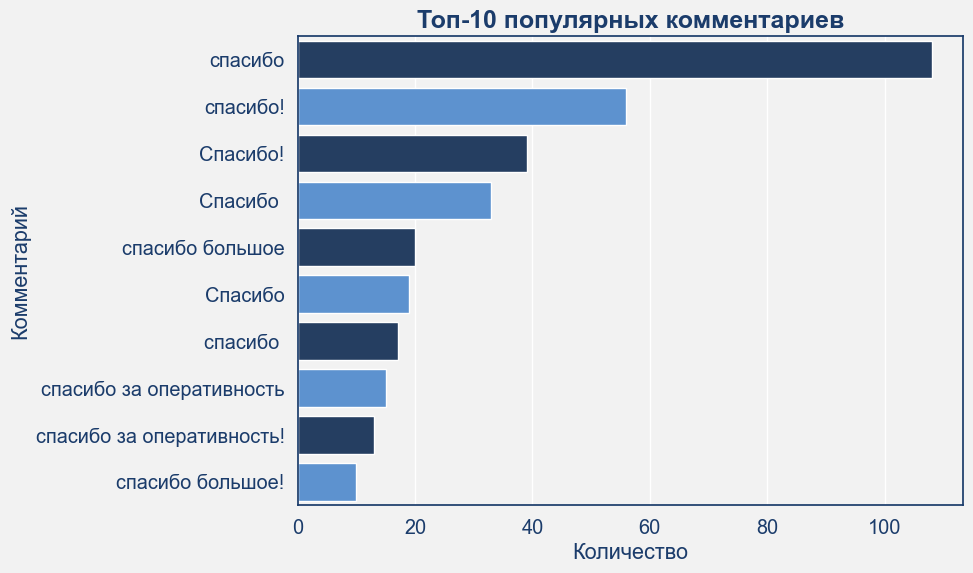

C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\1696938980.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\1696938980.py:37: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


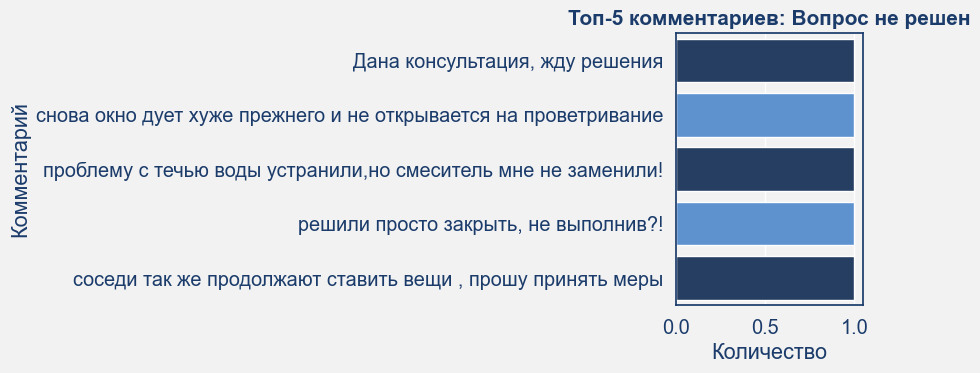

C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\1696938980.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\1696938980.py:37: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


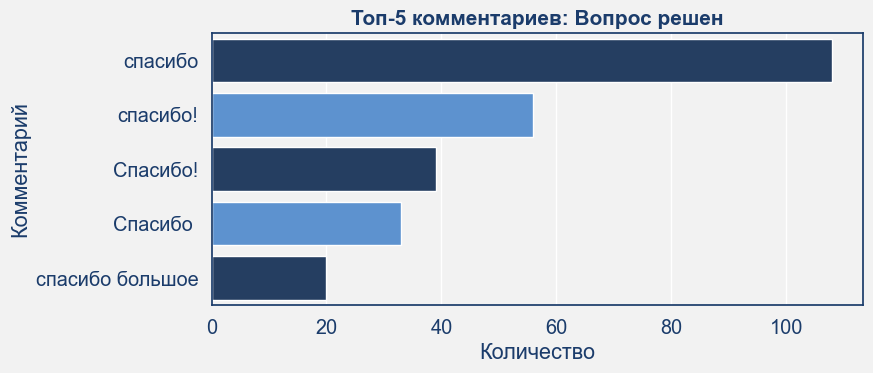

C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\1696938980.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\1696938980.py:37: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
) missing from font(s) Arial.l\Temp\ipykernel_8252\1696938980.py:45: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from font(s) Arial.ns4\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


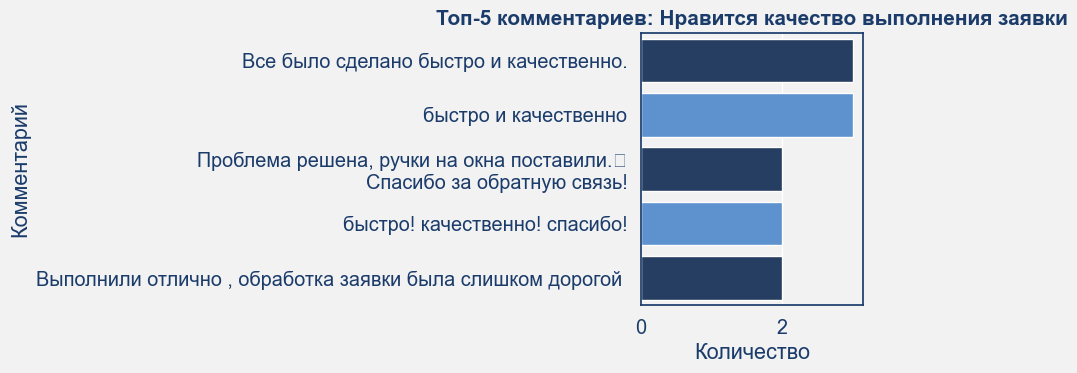

C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\1696938980.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\1696938980.py:37: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


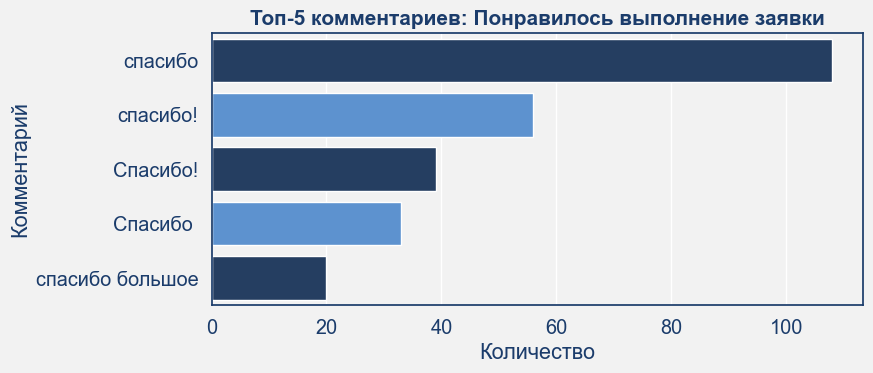

C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\1696938980.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\1696938980.py:37: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\1696938980.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


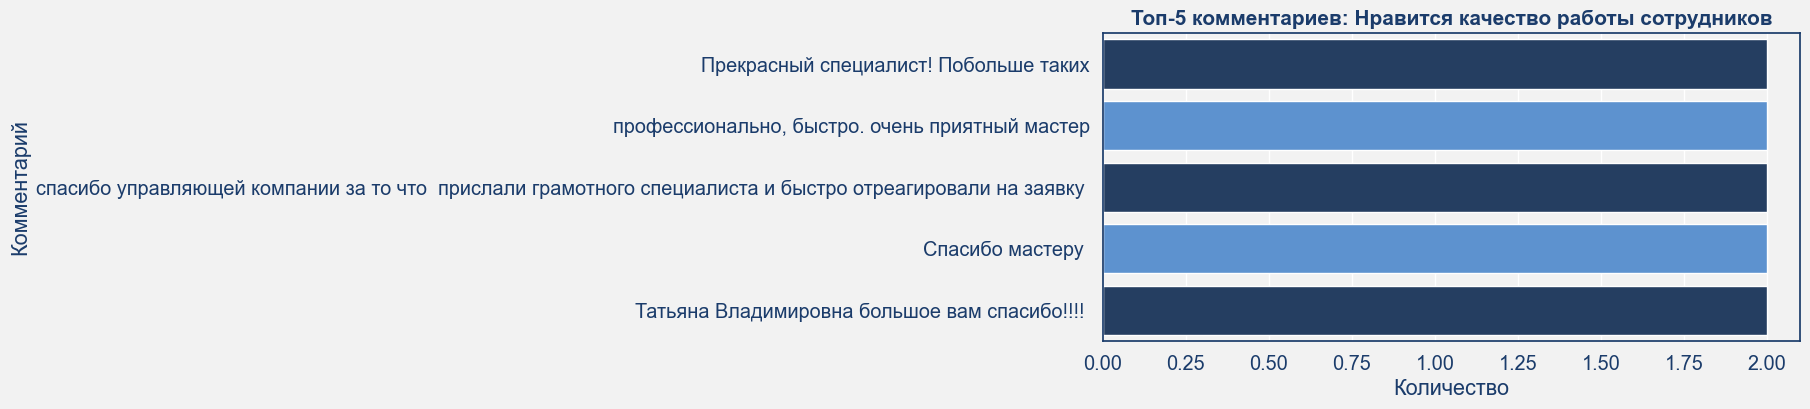

C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\1696938980.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\1696938980.py:37: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
) missing from font(s) Arial.l\Temp\ipykernel_8252\1696938980.py:45: UserWarning: Glyph 13 (
  plt.tight_layout()
C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\1696938980.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
) missing from font(s) Arial.ns4\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


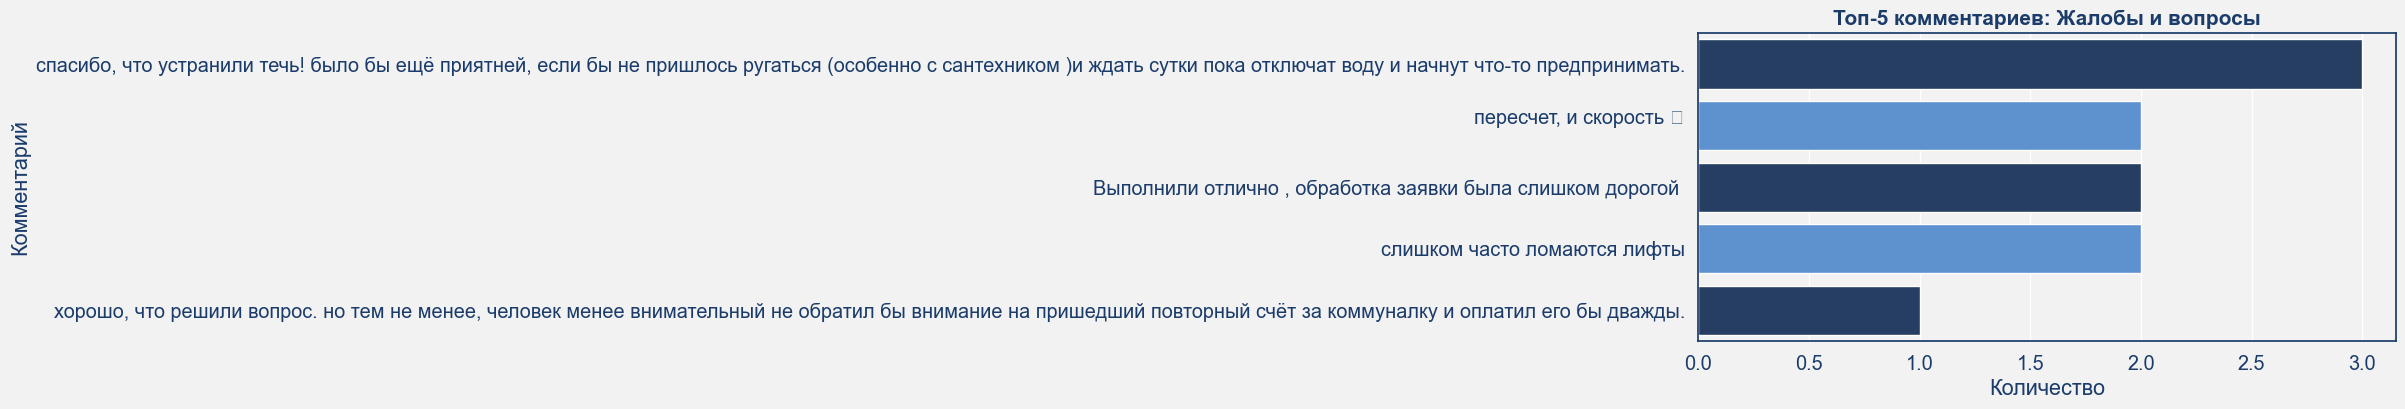

C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\1696938980.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\1696938980.py:37: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


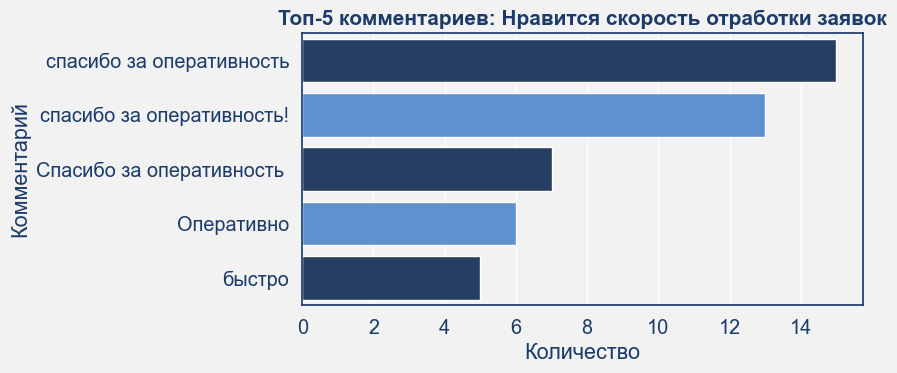

In [29]:
# ...вставьте в новую ячейку после анализа...

# --- Стиль "Самолет" ---
samolet_palette = ['#1B3C6B', '#4A90E2']
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.3, rc={
    'axes.facecolor': '#F2F2F2',
    'figure.facecolor': '#F2F2F2',
    'axes.edgecolor': '#1B3C6B',
    'axes.labelcolor': '#1B3C6B',
    'xtick.color': '#1B3C6B',
    'ytick.color': '#1B3C6B',
    'text.color': '#1B3C6B',
    'axes.titleweight': 'bold'
})

# --- 1. Популярность комментариев (общий) ---
comment_counts = df['comment'].value_counts().head(10)  # Топ-10

plt.figure(figsize=(10, 6))
sns.barplot(
    y=comment_counts.index, 
    x=comment_counts.values, 
    palette=samolet_palette
)
plt.title('Топ-10 популярных комментариев', fontsize=18, weight='bold')
plt.xlabel('Количество')
plt.ylabel('Комментарий')
plt.tight_layout()
plt.show()

# --- 2. Популярность комментариев по каждому классу ---

for cat in cols:
    top_comments = df[df[cat] == 1]['comment'].value_counts().head(5)
    plt.figure(figsize=(9, 4))
    sns.barplot(
        y=top_comments.index, 
        x=top_comments.values, 
        palette=samolet_palette
    )
    plt.title(f'Топ-5 комментариев: {cat}', fontsize=15, weight='bold')
    plt.xlabel('Количество')
    plt.ylabel('Комментарий')
    plt.tight_layout()
    plt.show()

C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\3192952676.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\3192952676.py:23: UserWarning: 
The palette list has fewer values (2) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


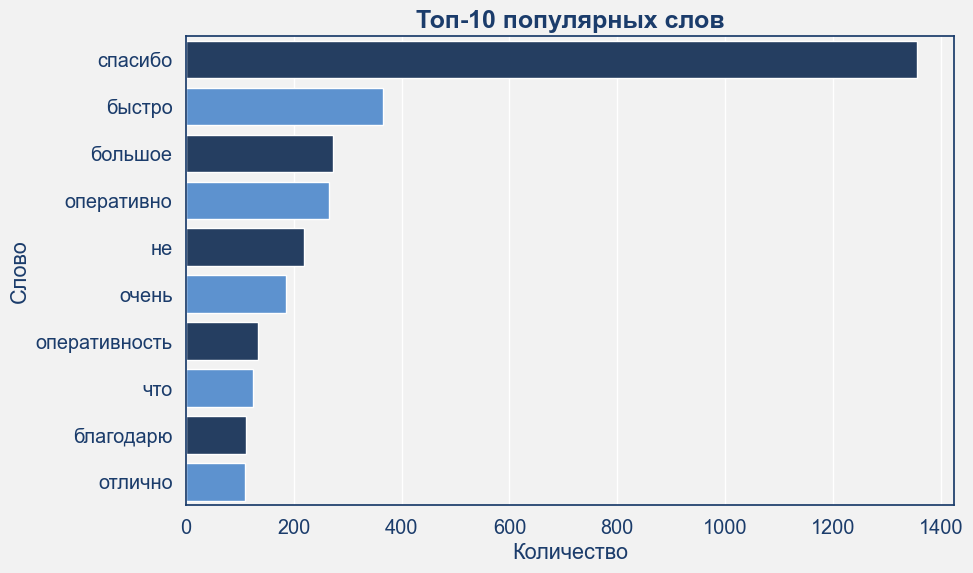

C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\3192952676.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\3192952676.py:40: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


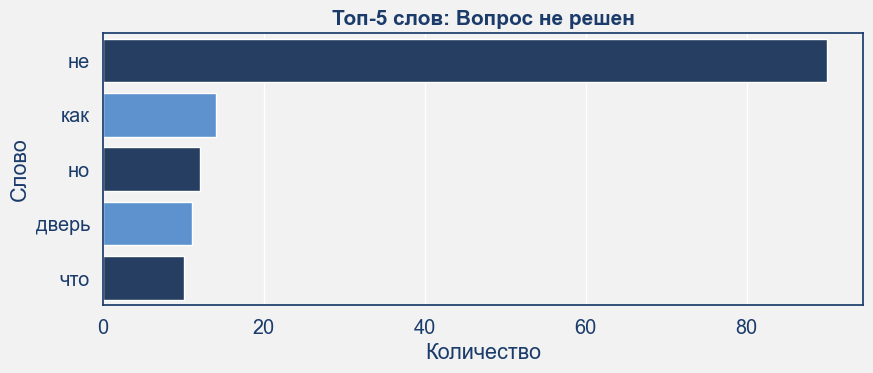

C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\3192952676.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\3192952676.py:40: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


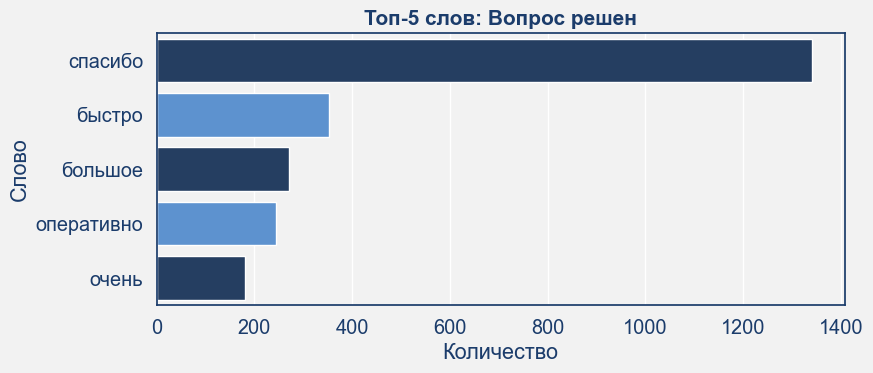

C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\3192952676.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\3192952676.py:40: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


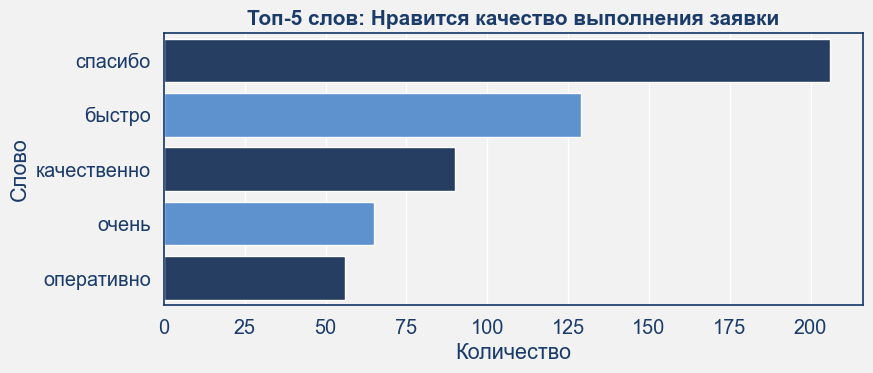

C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\3192952676.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\3192952676.py:40: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


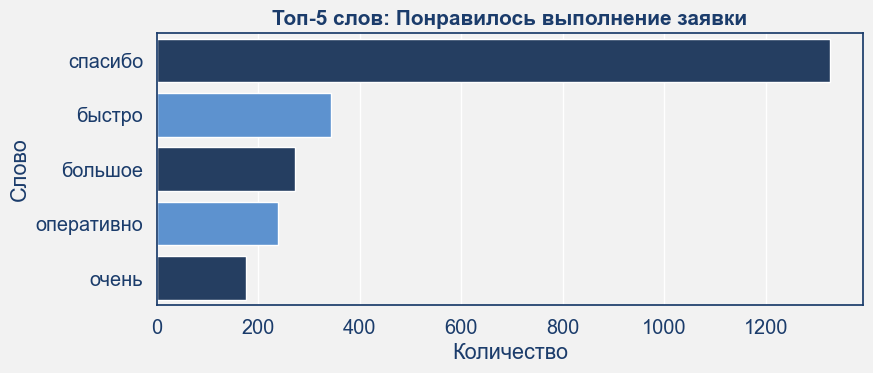

C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\3192952676.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\3192952676.py:40: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


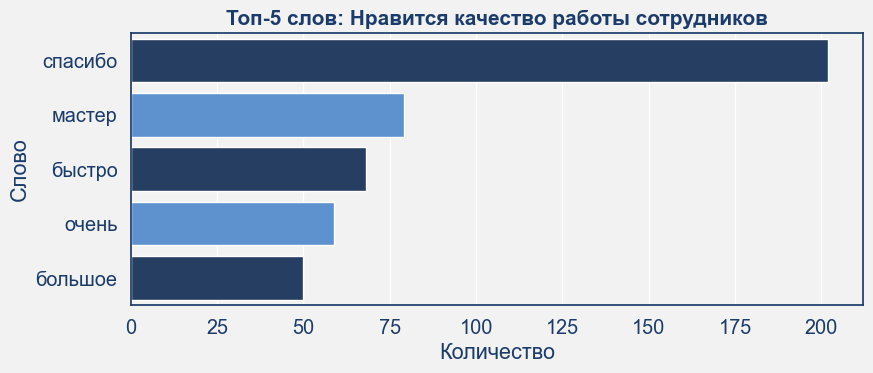

C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\3192952676.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\3192952676.py:40: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


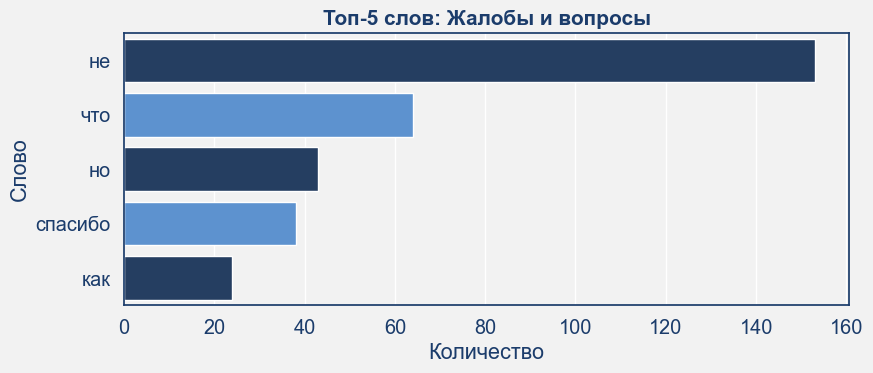

C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\3192952676.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\3192952676.py:40: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


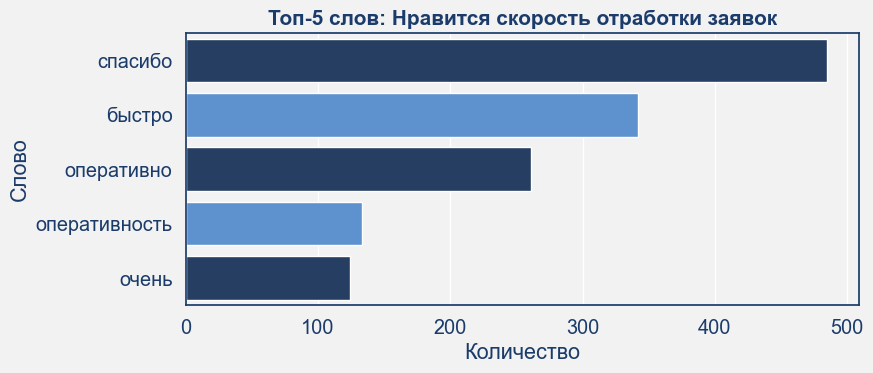

In [31]:
# --- Стиль "Самолет" ---
samolet_palette = ['#1B3C6B', '#4A90E2']
# plt.style.use('seaborn-v0_8-whitegrid')  # Можно убрать, если вызывает ошибку
sns.set(font_scale=1.3, rc={
    'axes.facecolor': '#F2F2F2',
    'figure.facecolor': '#F2F2F2',
    'axes.edgecolor': '#1B3C6B',
    'axes.labelcolor': '#1B3C6B',
    'xtick.color': '#1B3C6B',
    'ytick.color': '#1B3C6B',
    'text.color': '#1B3C6B',
    'axes.titleweight': 'bold'
})

from collections import Counter

# --- 1. Популярность слов (общий) ---
all_words = ' '.join(df['cleaned_comment']).split()
word_counts = Counter(all_words)
top_words = word_counts.most_common(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    y=[w[0] for w in top_words],
    x=[w[1] for w in top_words],
    palette=samolet_palette
)
plt.title('Топ-10 популярных слов', fontsize=18, weight='bold')
plt.xlabel('Количество')
plt.ylabel('Слово')
plt.tight_layout()
plt.show()

# --- 2. Популярность слов по каждому классу ---
for cat in cols:
    words = ' '.join(df[df[cat] == 1]['cleaned_comment']).split()
    word_counts = Counter(words)
    top_words = word_counts.most_common(5)
    plt.figure(figsize=(9, 4))
    sns.barplot(
        y=[w[0] for w in top_words],
        x=[w[1] for w in top_words],
        palette=samolet_palette
    )
    plt.title(f'Топ-5 слов: {cat}', fontsize=15, weight='bold')
    plt.xlabel('Количество')
    plt.ylabel('Слово')
    plt.tight_layout()
    plt.show()

In [32]:
rat_df = pd.read_csv('rating_check.csv')

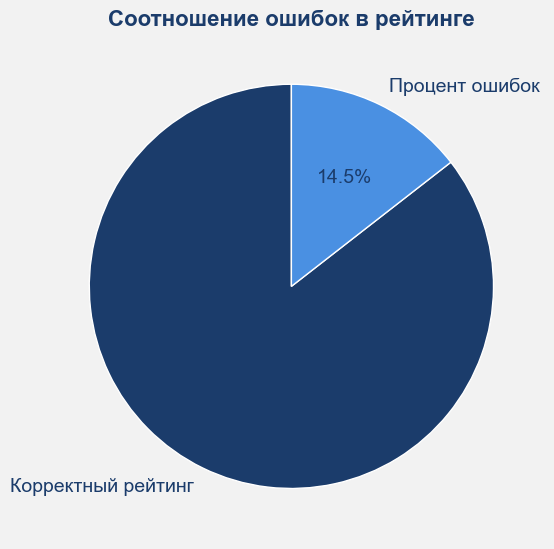

In [35]:
# --- Круговая диаграмма по rating_error ---
samolet_palette = ['#1B3C6B', '#4A90E2']
plt.figure(figsize=(6, 6))
error_counts = rat_df['rating_error'].value_counts()
labels = ['Корректный рейтинг', 'Процент ошибок'] if error_counts.index[0] == False else ['Процент ошибок', 'Корректный рейтинг']

plt.pie(
    error_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=samolet_palette,
    textprops={'color': '#1B3C6B', 'fontsize': 14}
)
plt.title('Соотношение ошибок в рейтинге', fontsize=16, weight='bold', color='#1B3C6B')
plt.gca().set_facecolor('#F2F2F2')
plt.tight_layout()
plt.show()

C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\2939483883.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\2939483883.py:17: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.barplot(


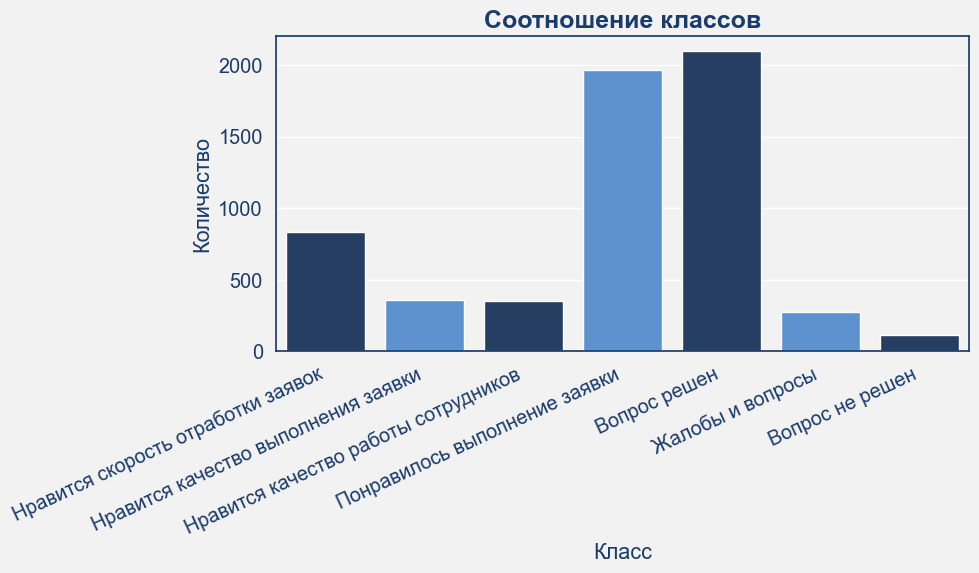

In [40]:
# --- Вертикальная столбчатая диаграмма по классам ---
samolet_palette = ['#1B3C6B', '#4A90E2']
# plt.style.use('seaborn-v0_8-whitegrid')  # Можно убрать, если вызывает ошибку
sns.set(font_scale=1.3, rc={
    'axes.facecolor': '#F2F2F2',
    'figure.facecolor': '#F2F2F2',
    'axes.edgecolor': '#1B3C6B',
    'axes.labelcolor': '#1B3C6B',
    'xtick.color': '#1B3C6B',
    'ytick.color': '#1B3C6B',
    'text.color': '#1B3C6B',
    'axes.titleweight': 'bold'
})

class_counts = [df[col].sum() for col in cols]
plt.figure(figsize=(10, 6))
sns.barplot(
    x=cols,
    y=class_counts,
    palette=samolet_palette * (len(cols) // len(samolet_palette) + 1)
)
plt.title('Соотношение классов', fontsize=18, weight='bold')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.xticks(rotation=25, ha='right')
plt.tight_layout()
plt.show()

C:\Users\Skromny\AppData\Local\Temp\ipykernel_8252\3760970959.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


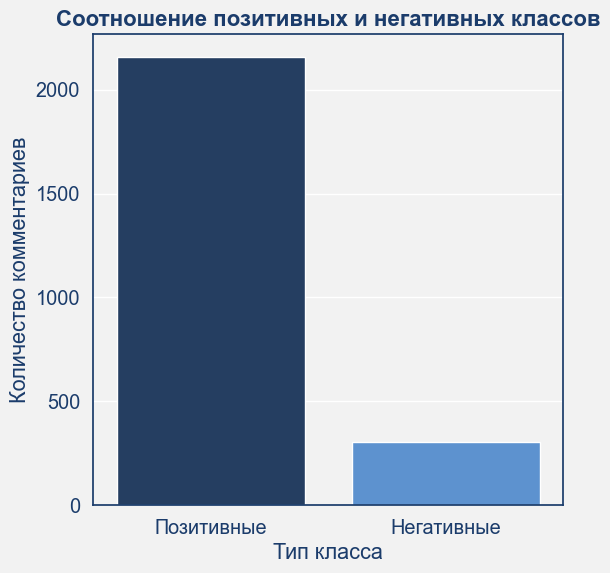

In [41]:
# --- Вертикальная столбчатая диаграмма: соотношение позитивных и негативных классов ---

positive_classes = [
    'Нравится скорость отработки заявок',
    'Нравится качество выполнения заявки',
    'Нравится качество работы сотрудников',
    'Понравилось выполнение заявки',
    'Вопрос решен'
]
negative_classes = [
    'Жалобы и вопросы',
    'Вопрос не решен'
]

# Для каждого комментария определяем, есть ли у него позитивные/негативные классы
positive_mask = df[positive_classes].any(axis=1)
negative_mask = df[negative_classes].any(axis=1)

# Считаем количество комментариев с позитивными и негативными классами
positive_count = positive_mask.sum()
negative_count = negative_mask.sum()

plt.figure(figsize=(6, 6))
sns.barplot(
    x=['Позитивные', 'Негативные'],
    y=[positive_count, negative_count],
    palette=samolet_palette
)
plt.title('Соотношение позитивных и негативных классов', fontsize=16, weight='bold')
plt.xlabel('Тип класса')
plt.ylabel('Количество комментариев')
plt.tight_layout()
plt.show()